In [200]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification_report, confusion_matrix
import sklearn
from sklearn.model_selection import RandomizedSearchCV

In [201]:
# Load dataset
df = pd.read_csv("california_housing.csv")
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price_above_median
0,2.1827,26.0,4.521429,0.921429,305.0,2.178571,40.05,-122.10,0
1,3.0755,32.0,4.623068,0.983353,3868.0,4.599287,32.77,-117.06,0
2,1.8235,40.0,4.701149,1.126437,928.0,3.555556,37.75,-122.16,0
3,1.4625,37.0,4.247845,1.105603,1673.0,3.605603,33.99,-118.28,0
4,1.9063,13.0,3.453125,0.984375,286.0,4.468750,33.97,-118.16,0


In [202]:
# Shape and size of raw data
print("Shape of dataset:", df.shape)
print("Size of dataset:", df.size)

Shape of dataset: (20634, 9)
Size of dataset: 185706


In [203]:
# Get information about datatypes. No need for conversion.
print("\nData Types:")
print(df.dtypes)


Data Types:
MedInc                float64
HouseAge              float64
AveRooms              float64
AveBedrms             float64
Population            float64
AveOccup              float64
Latitude              float64
Longitude             float64
price_above_median      int64
dtype: object


In [204]:
# Check for duplicates
duplicates = df.duplicated().sum()
print("\nNumber of duplicate rows:", duplicates)
if duplicates > 0:
    df = df.drop_duplicates()
    print("Duplicates removed.")


Number of duplicate rows: 0


In [205]:
# Statistical summary
# Comments: The max values for MedInc, AveRooms, AveBedrms, Population, and AveOccup are oddly high. Outliers. 
print("\nStatistical Summary:")
print(df.describe())


Statistical Summary:
             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20634.000000  20634.000000  20634.000000  20634.000000  20634.000000   
mean       3.870795     28.640399      5.429171      1.096628   1425.398081   
std        1.899796     12.584629      2.474393      0.473929   1132.137403   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563925     18.000000      4.440930      1.006067    787.000000   
50%        3.534950     29.000000      5.229190      1.048780   1166.000000   
75%        4.743550     37.000000      6.052381      1.099499   1725.000000   
max       15.000100     52.000000    141.909091     34.066667  35682.000000   

           AveOccup      Latitude     Longitude  price_above_median  
count  20634.000000  20634.000000  20634.000000        20634.000000  
mean       3.070449     35.631722   -119.569594            0.500000  
std       10.387501      2.135738      2.003457         

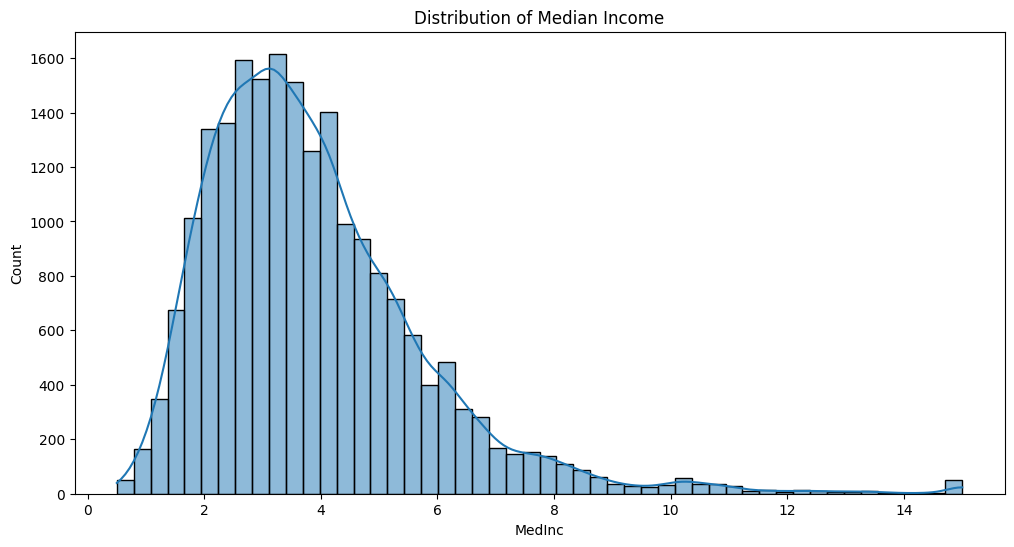

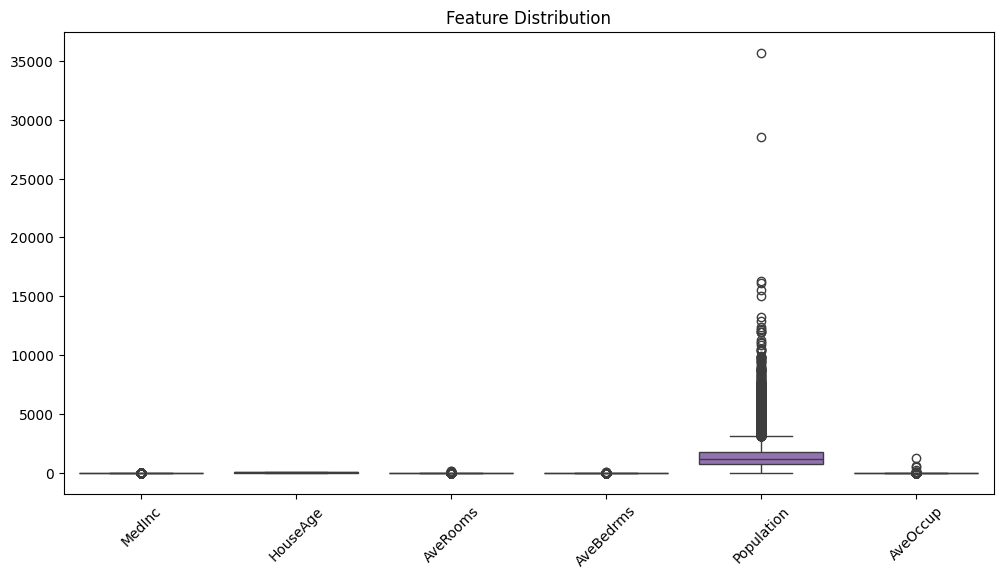

In [206]:
# Visualizations
plt.figure(figsize=(12, 6))
sns.histplot(df['MedInc'], bins=50, kde=True)
plt.title("Distribution of Median Income")
plt.show()

# Univariate Boxplot Analysis
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup']])
plt.xticks(rotation=45)
plt.title("Feature Distribution")
plt.show()

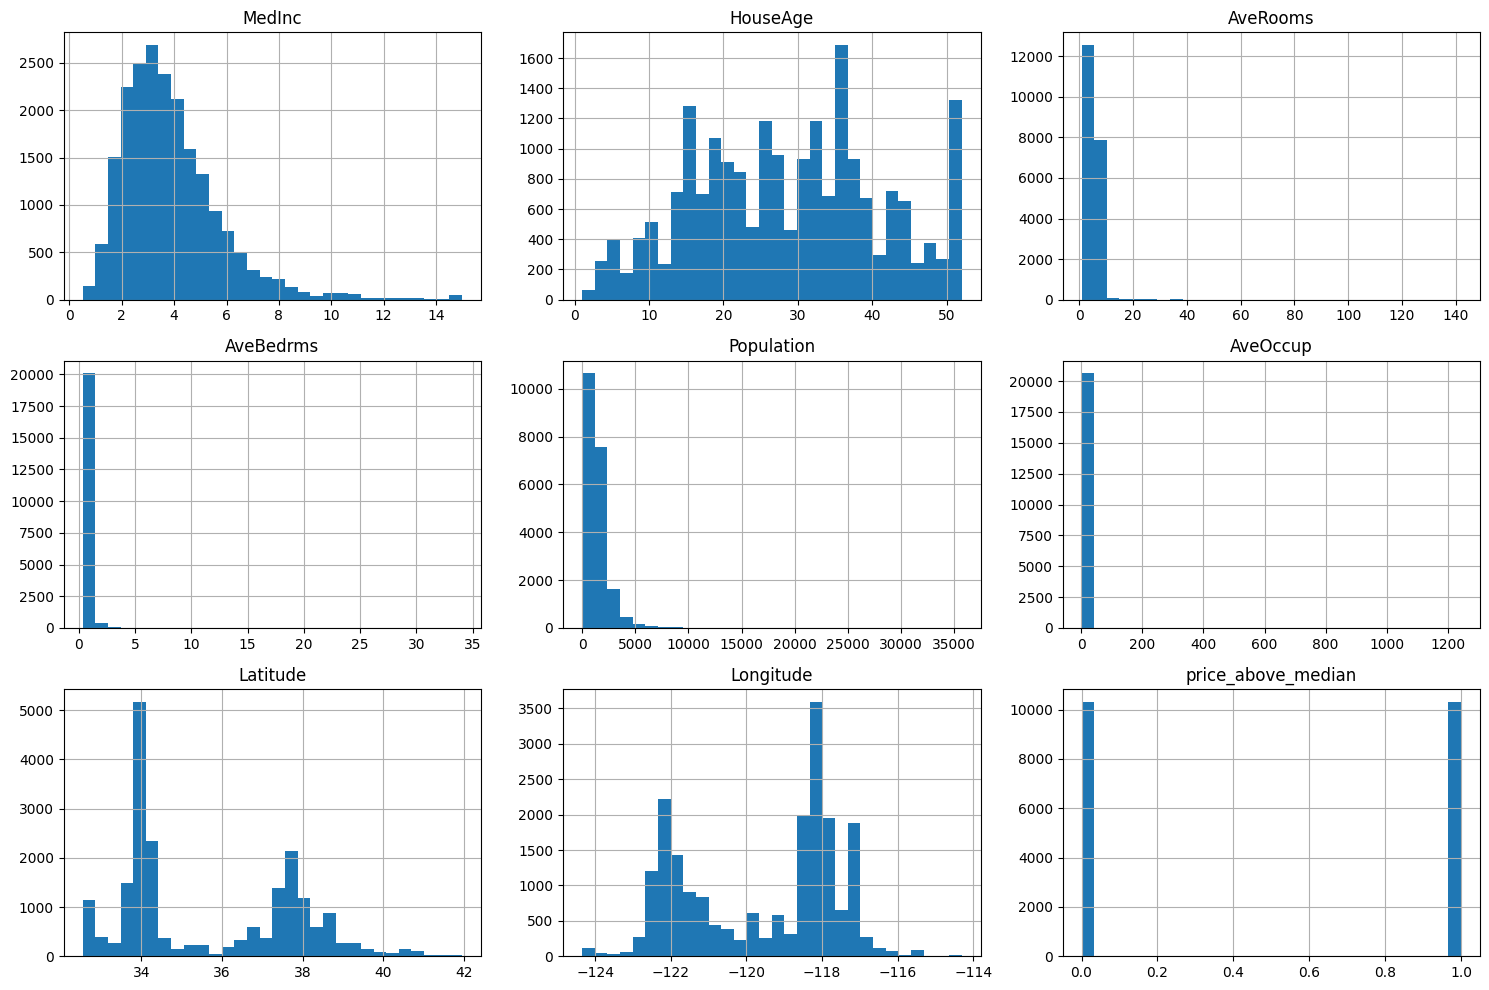

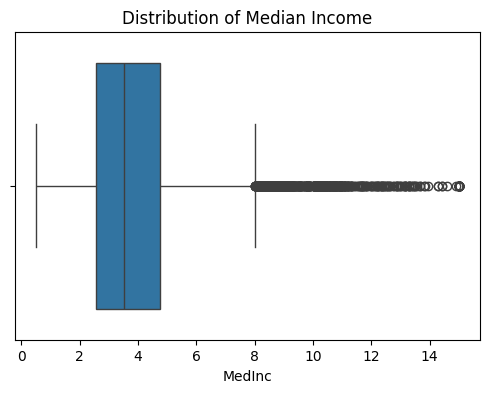

In [207]:
df.hist(bins=30, figsize=(15, 10))
plt.tight_layout()
plt.show()

plt.figure(figsize=(6,4))
sns.boxplot(x=df['MedInc'])
plt.title('Distribution of Median Income')
plt.show()

In [208]:
# Splitting data into features and target variable
X = df.drop(columns=['price_above_median'])
y = df['price_above_median']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=1)

In [209]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

----- K-Nearest Neighbors -----
Classification Report for KNN:
              precision    recall  f1-score   support

           0       0.84      0.83      0.84      3095
           1       0.83      0.84      0.84      3096

    accuracy                           0.84      6191
   macro avg       0.84      0.84      0.84      6191
weighted avg       0.84      0.84      0.84      6191



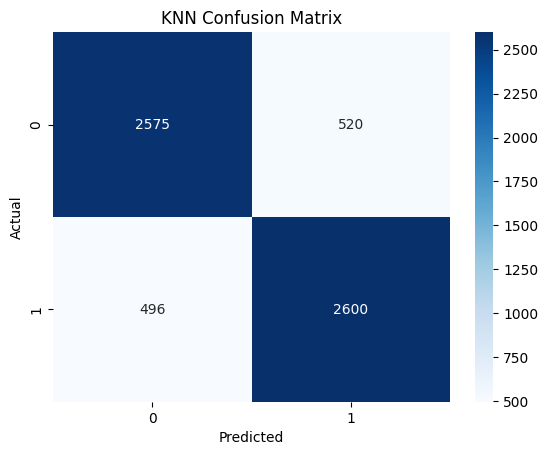

In [210]:
param_grid = {'n_neighbors': range(1, 21)}
knn = KNeighborsClassifier()
grid_knn = GridSearchCV(knn, param_grid, cv=5)
grid_knn.fit(X_train_scaled, y_train)

best_knn = grid_knn.best_estimator_

print("----- K-Nearest Neighbors -----")
y_pred_knn = best_knn.predict(X_test_scaled)
print("Classification Report for KNN:")
print(classification_report(y_test, y_pred_knn))
cm_knn = confusion_matrix(y_test, y_pred_knn)
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues')
plt.title('KNN Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

Best Hyperparameters: {'criterion': 'entropy', 'max_depth': 10, 'max_features': None, 'min_samples_leaf': 2, 'min_samples_split': 10}
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.86      0.85      2491
           1       0.86      0.84      0.85      2552

    accuracy                           0.85      5043
   macro avg       0.85      0.85      0.85      5043
weighted avg       0.85      0.85      0.85      5043



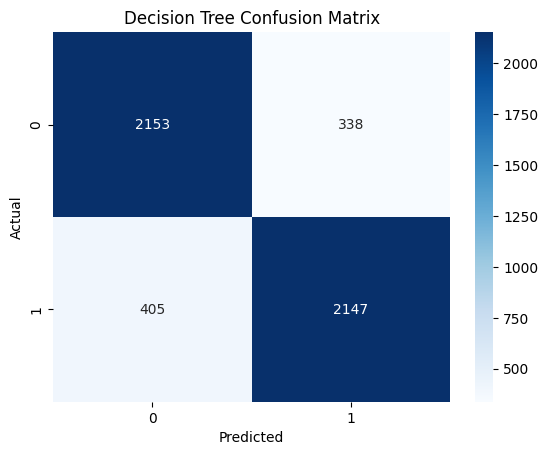

In [227]:
# Hyperparameter grid
param_grid = {
    'max_depth': [5, 10, 15, 20],  
    'min_samples_split': [2, 5, 10],  
    'min_samples_leaf': [1, 2, 4],  
    'criterion': ['gini', 'entropy'],  
    'max_features': ['sqrt', 'log2', None]  
}

dt = DecisionTreeClassifier(random_state=42)
grid_search = GridSearchCV(dt, param_grid, cv=5, scoring='f1', n_jobs=-1)
grid_search.fit(X_train, y_train)
best_dt = grid_search.best_estimator_
best_dt.fit(X_train, y_train)
y_pred_dt = best_dt.predict(X_test)

print("Best Hyperparameters:", grid_search.best_params_)

print("Classification Report:")
print(classification_report(y_test, y_pred_dt))

cm_dt = confusion_matrix(y_test, y_pred_dt)
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues')
plt.title('Decision Tree Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

Best Hyperparameters: {'n_estimators': 50, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 20}
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.90      0.89      2491
           1       0.90      0.89      0.89      2552

    accuracy                           0.89      5043
   macro avg       0.89      0.89      0.89      5043
weighted avg       0.89      0.89      0.89      5043



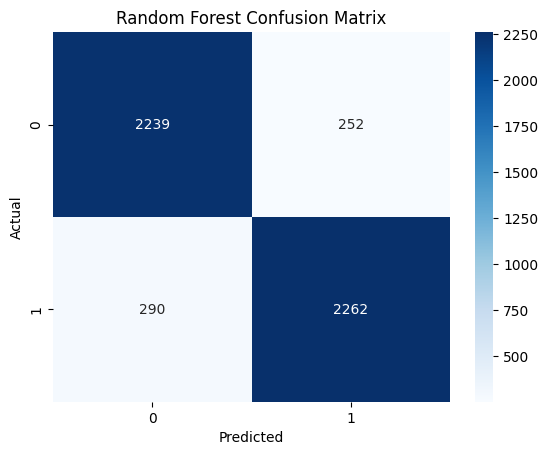

In [229]:
# Hyperparameter grid
param_dist = {
    'n_estimators': [50, 100],
    'max_depth': [10, 20, None],  
    'min_samples_split': [2, 5],  
    'min_samples_leaf': [1, 2],  
    'max_features': ['sqrt', 'log2']  
}

rf = RandomForestClassifier(random_state=42)
random_search_rf = RandomizedSearchCV(rf, param_dist, n_iter=10, cv=3, scoring='f1', n_jobs=-1, random_state=42)
random_search_rf.fit(X_train, y_train)
best_rf = random_search_rf.best_estimator_
y_pred_rf = best_rf.predict(X_test)

print("Best Hyperparameters:", random_search_rf.best_params_)

print("Classification Report:")
print(classification_report(y_test, y_pred_rf))

cm_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues')
plt.title('Random Forest Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

Best Hyperparameters: {'n_estimators': 100, 'learning_rate': 1, 'estimator': DecisionTreeClassifier(max_depth=2)}
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.88      0.89      2491
           1       0.89      0.89      0.89      2552

    accuracy                           0.89      5043
   macro avg       0.89      0.89      0.89      5043
weighted avg       0.89      0.89      0.89      5043



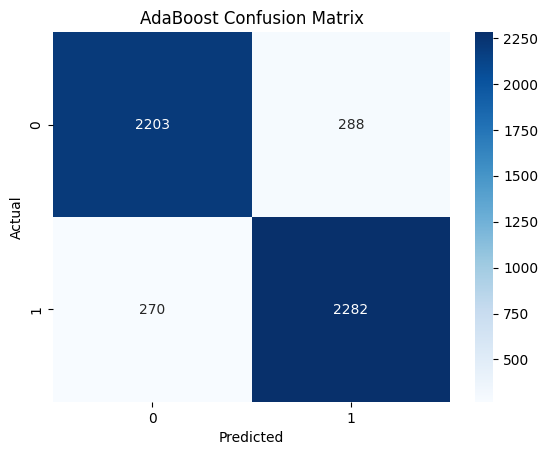

In [230]:
# Hyperparameter grid
param_dist = {
    'n_estimators': [50, 100, 200],  
    'learning_rate': [0.01, 0.1, 1],  
    'estimator': [DecisionTreeClassifier(max_depth=1), DecisionTreeClassifier(max_depth=2)]  
}

ada = AdaBoostClassifier(random_state=42)
random_search_ada = RandomizedSearchCV(ada, param_dist, n_iter=10, cv=3, scoring='f1', n_jobs=-1, random_state=42)
random_search_ada.fit(X_train, y_train)
best_ada = random_search_ada.best_estimator_
y_pred_ada = best_ada.predict(X_test)

print("Best Hyperparameters:", random_search_ada.best_params_)

print("Classification Report:")
print(classification_report(y_test, y_pred_ada))

cm_ada = confusion_matrix(y_test, y_pred_ada)
sns.heatmap(cm_ada, annot=True, fmt='d', cmap='Blues')
plt.title('AdaBoost Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()


In [231]:
def remove_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]

# List of columns with high max values
columns_to_filter = ['MedInc', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup']

for col in columns_to_filter:
    df = remove_outliers_iqr(df, col)

print("New dataset shape after outlier removal:", df.shape)

New dataset shape after outlier removal: (16027, 9)


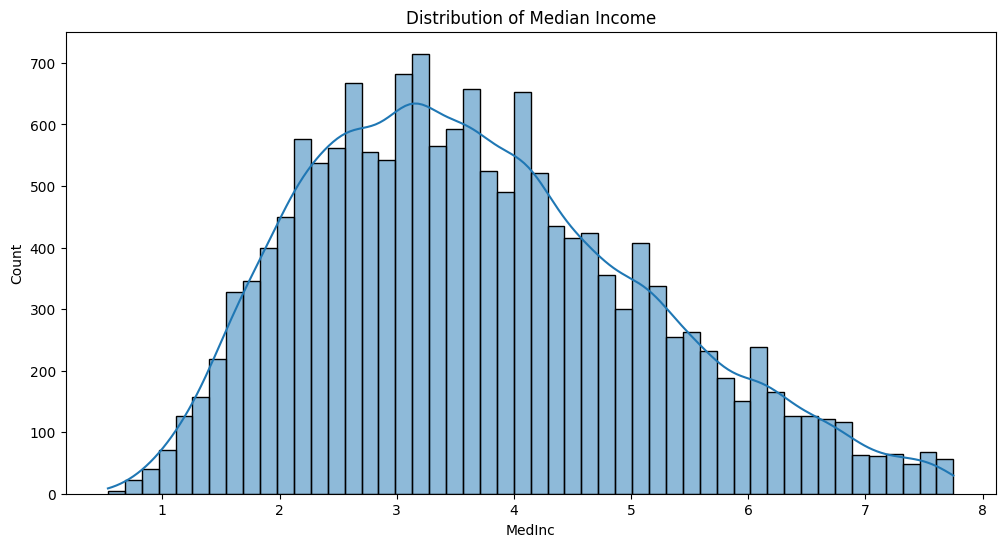

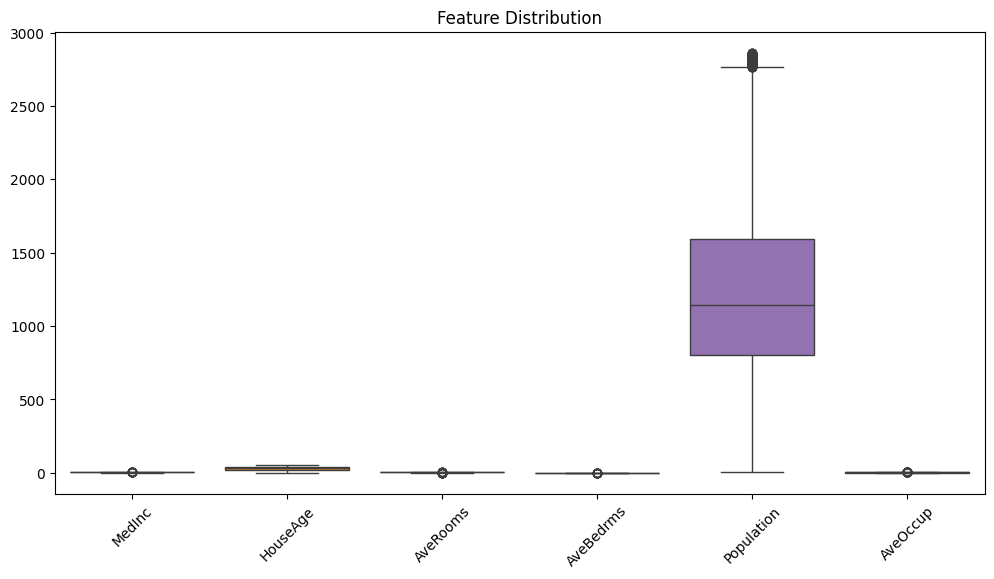

In [232]:
# Visualizations
plt.figure(figsize=(12, 6))
sns.histplot(df['MedInc'], bins=50, kde=True)
plt.title("Distribution of Median Income")
plt.show()

# Univariate Boxplot Analysis
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup']])
plt.xticks(rotation=45)
plt.title("Feature Distribution")
plt.show()

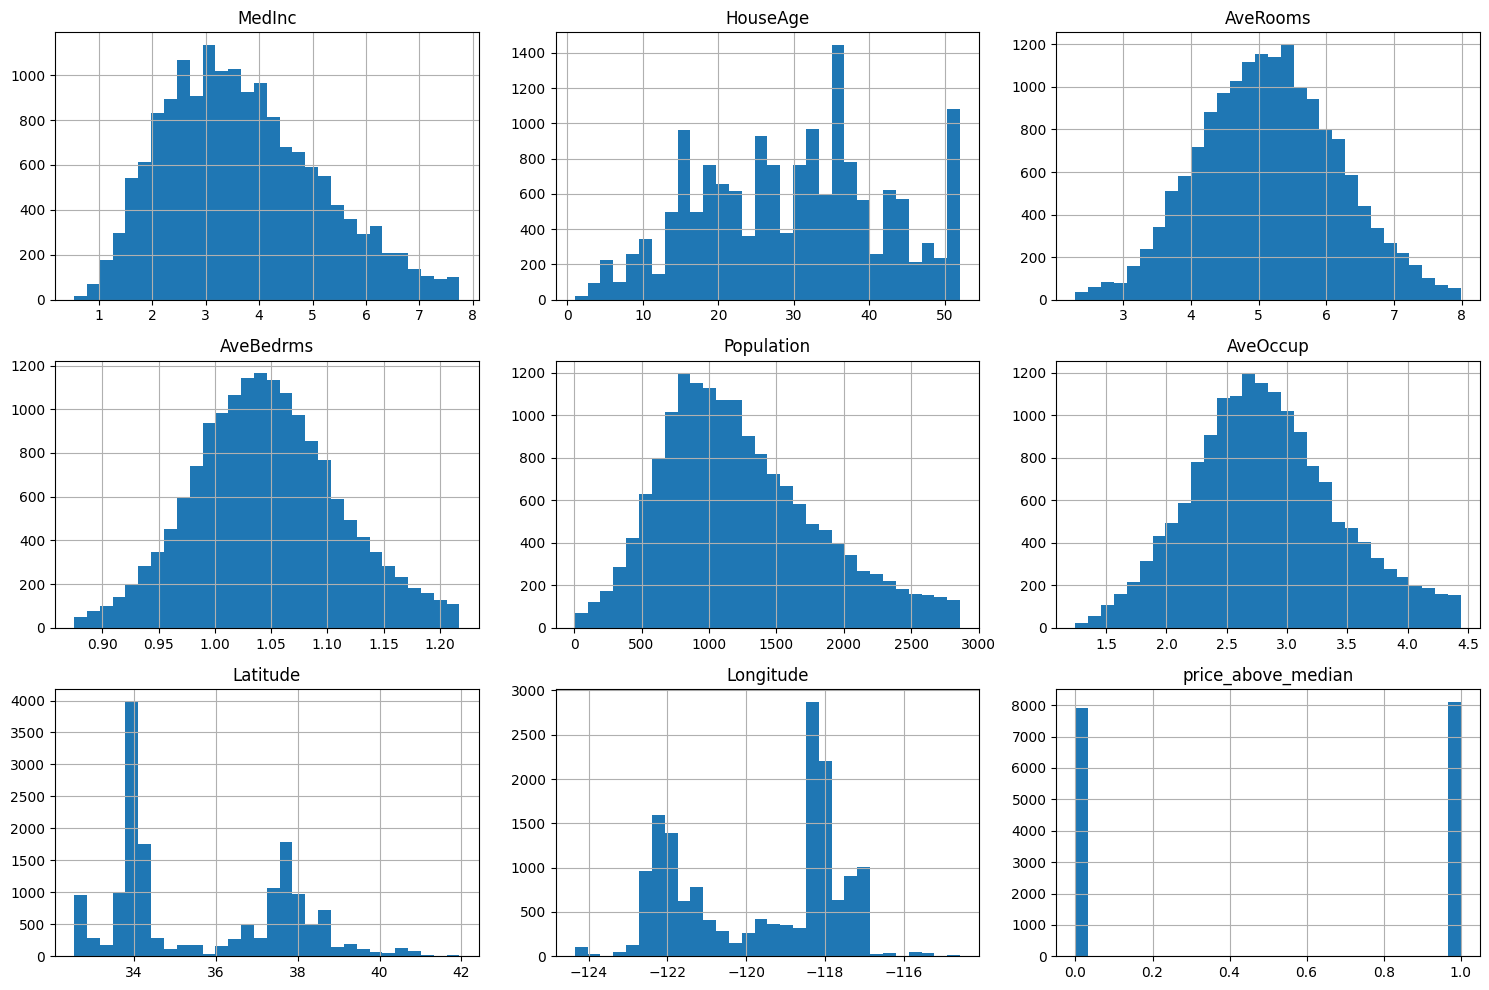

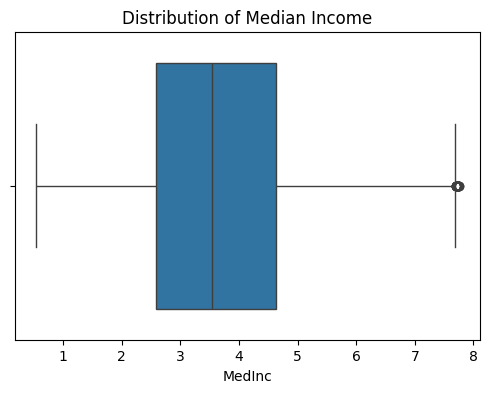

In [233]:
df.hist(bins=30, figsize=(15, 10))
plt.tight_layout()
plt.show()

plt.figure(figsize=(6,4))
sns.boxplot(x=df['MedInc'])
plt.title('Distribution of Median Income')
plt.show()

In [234]:
# Splitting data into features and target variable
X = df.drop(columns=['price_above_median'])
y = df['price_above_median']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=1)

In [235]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

----- K-Nearest Neighbors -----
Classification Report for KNN:
              precision    recall  f1-score   support

           0       0.82      0.84      0.83      2375
           1       0.84      0.82      0.83      2434

    accuracy                           0.83      4809
   macro avg       0.83      0.83      0.83      4809
weighted avg       0.83      0.83      0.83      4809



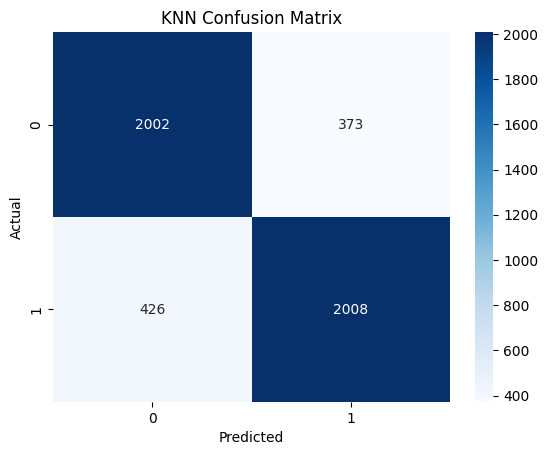

In [236]:
param_grid = {'n_neighbors': range(1, 21)}
knn = KNeighborsClassifier()
grid_knn = GridSearchCV(knn, param_grid, cv=5)
grid_knn.fit(X_train_scaled, y_train)

best_knn = grid_knn.best_estimator_

print("----- K-Nearest Neighbors -----")
y_pred_knn = best_knn.predict(X_test_scaled)
print("Classification Report for KNN:")
print(classification_report(y_test, y_pred_knn))
cm_knn = confusion_matrix(y_test, y_pred_knn)
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues')
plt.title('KNN Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

Best Hyperparameters: {'criterion': 'entropy', 'max_depth': 10, 'max_features': None, 'min_samples_leaf': 4, 'min_samples_split': 10}
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.85      0.85      2375
           1       0.85      0.85      0.85      2434

    accuracy                           0.85      4809
   macro avg       0.85      0.85      0.85      4809
weighted avg       0.85      0.85      0.85      4809



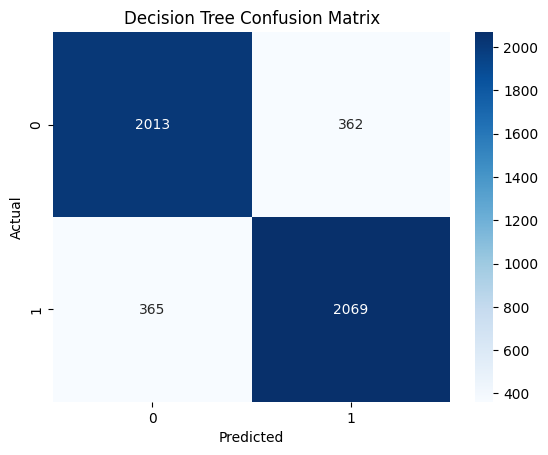

In [237]:
# Hyperparameter grid
param_grid = {
    'max_depth': [5, 10, 15, 20],  
    'min_samples_split': [2, 5, 10],  
    'min_samples_leaf': [1, 2, 4],  
    'criterion': ['gini', 'entropy'],  
    'max_features': ['sqrt', 'log2', None]  
}

dt = DecisionTreeClassifier(random_state=42)
grid_search = GridSearchCV(dt, param_grid, cv=5, scoring='f1', n_jobs=-1)
grid_search.fit(X_train, y_train)
best_dt = grid_search.best_estimator_
best_dt.fit(X_train, y_train)
y_pred_dt = best_dt.predict(X_test)

print("Best Hyperparameters:", grid_search.best_params_)

print("Classification Report:")
print(classification_report(y_test, y_pred_dt))

cm_dt = confusion_matrix(y_test, y_pred_dt)
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues')
plt.title('Decision Tree Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [ ]:
# Hyperparameter grid
param_dist = {
    'n_estimators': [50, 100],
    'max_depth': [10, 20, None],  
    'min_samples_split': [2, 5],  
    'min_samples_leaf': [1, 2],  
    'max_features': ['sqrt', 'log2']  
}

rf = RandomForestClassifier(random_state=42)
random_search_rf = RandomizedSearchCV(rf, param_dist, n_iter=10, cv=3, scoring='f1', n_jobs=-1, random_state=42)
random_search_rf.fit(X_train, y_train)
best_rf = random_search_rf.best_estimator_
y_pred_rf = best_rf.predict(X_test)

print("Best Hyperparameters:", random_search_rf.best_params_)

print("Classification Report:")
print(classification_report(y_test, y_pred_rf))

cm_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues')
plt.title('Random Forest Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

Best Hyperparameters: {'n_estimators': 100, 'learning_rate': 1, 'estimator': DecisionTreeClassifier(max_depth=2)}
----- Optimized AdaBoost (Faster) -----
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.88      0.89      2491
           1       0.89      0.89      0.89      2552

    accuracy                           0.89      5043
   macro avg       0.89      0.89      0.89      5043
weighted avg       0.89      0.89      0.89      5043



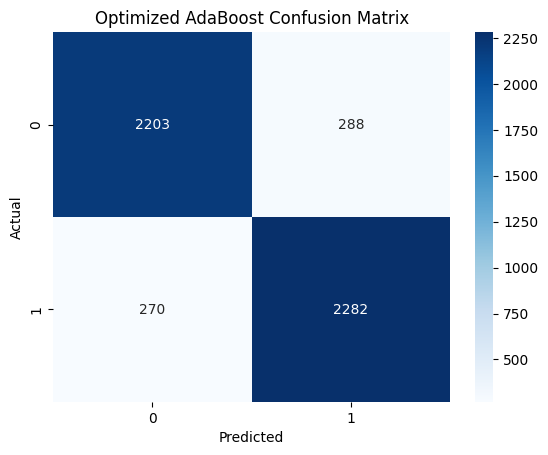

In [225]:
# Define hyperparameter search space
param_dist = {
    'n_estimators': [50, 100, 200],  # Number of weak learners
    'learning_rate': [0.01, 0.1, 1],  # Step size
    'estimator': [DecisionTreeClassifier(max_depth=1), DecisionTreeClassifier(max_depth=2)]  # Weak learner
}

# Perform RandomizedSearchCV for faster tuning
ada = AdaBoostClassifier(random_state=42)
random_search_ada = RandomizedSearchCV(ada, param_dist, n_iter=10, cv=3, scoring='f1', n_jobs=-1, random_state=42)
random_search_ada.fit(X_train, y_train)

# Get the best model
best_ada = random_search_ada.best_estimator_

# Predict on test data
y_pred_ada = best_ada.predict(X_test)

# Print best hyperparameters
print("Best Hyperparameters:", random_search_ada.best_params_)

# Print classification report
print("----- Optimized AdaBoost (Faster) -----")
print("Classification Report:")
print(classification_report(y_test, y_pred_ada))

# Plot confusion matrix
cm_ada = confusion_matrix(y_test, y_pred_ada)
sns.heatmap(cm_ada, annot=True, fmt='d', cmap='Blues')
plt.title('Optimized AdaBoost Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()
